In [1]:
import pandas as pd
import numpy as np 
from sklearn import datasets 

In [2]:
iris = datasets.load_iris()

In [3]:
iris_data = pd.DataFrame(data=iris.data, columns=iris.feature_names)

In [4]:
iris_data["target"] = iris.target

In [5]:
iris_data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [6]:
iris_data.shape

(150, 5)

In [7]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [8]:
iris_data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [9]:
%matplotlib inline

In [10]:
import matplotlib.pyplot as plt 

array([[<AxesSubplot:title={'center':'sepal length (cm)'}>,
        <AxesSubplot:title={'center':'sepal width (cm)'}>],
       [<AxesSubplot:title={'center':'petal length (cm)'}>,
        <AxesSubplot:title={'center':'petal width (cm)'}>],
       [<AxesSubplot:title={'center':'target'}>, <AxesSubplot:>]],
      dtype=object)

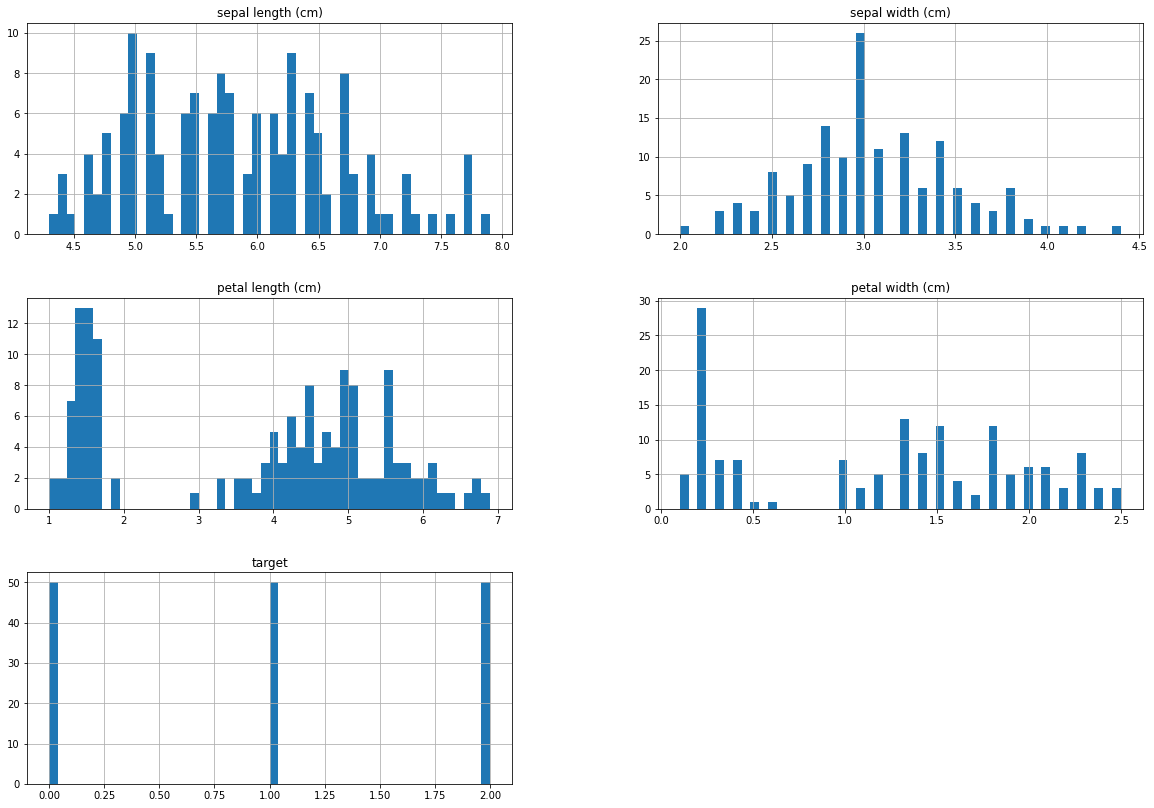

In [11]:
iris_data.hist(bins = 50 , figsize=(20,14))

In [12]:
from  sklearn.model_selection import train_test_split
train_set , test_set = train_test_split(iris_data , test_size=0.2 ,random_state=42)
print(f"Rows `in a train set : {len(train_set)} \n Rows in test set : {len(test_set)}")

Rows `in a train set : 120 
 Rows in test set : 30


In [13]:
corr_matrix = iris_data.corr()
corr_matrix["target"].sort_values(ascending=False)

target               1.000000
petal width (cm)     0.956547
petal length (cm)    0.949035
sepal length (cm)    0.782561
sepal width (cm)    -0.426658
Name: target, dtype: float64

In [14]:
iris_features = train_set.drop("target" , axis=1)
iris_label   = train_set["target"].copy()

In [15]:
iris_features.shape

(120, 4)

In [16]:
iris_label.shape

(120,)

In [17]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()

In [18]:
some_feature = iris_features[:5]
some_label = iris_label[:5]

In [19]:
model.fit(iris_features,iris_label)

KNeighborsClassifier()

In [20]:
model.predict(some_feature)

array([0, 0, 1, 0, 0])

In [21]:
list(some_label)

[0, 0, 1, 0, 0]

In [22]:
from joblib import dump ,load
dump(model , "Iris predictor.joblib")

['Iris predictor.joblib']